In [30]:
import seaborn as sns
import pandas as pd
import ffmpeg
import matplotlib.pyplot as plt
import csv

In [31]:
validated = pd.read_csv("../../../../../Desktop/cv-cat-18/ca/validated.tsv",delimiter="\t", escapechar="\\",quoting = csv.QUOTE_NONE)

durations = pd.read_csv("../../../../../Desktop/cv-cat-18/ca/clip_durations.tsv",delimiter='\t', escapechar="\\",quoting = csv.QUOTE_NONE)

validated = validated.merge(durations, how='left', left_on='path', right_on='clip')


/var/folders/2d/7d3c_x1x5mb40mc1sgr14p740000gn/T/ipykernel_17126/1040088783.py:1: DtypeWarning: Columns (4,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  validated = pd.read_csv("../../../../../Desktop/cv-cat-18/ca/validated.tsv",delimiter="\t", escapechar="\\",quoting = csv.QUOTE_NONE)


In [32]:
validated.head(5)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]
0,002da2f2e96425608fdbad1301a23e3c028bc76b719a89...,common_voice_ca_30978949.mp3,c9a76d9abdc6b4e4306df7379ca4bf9aa4a8ed95624038...,Era una gran lluitadora de torcebraç reconegud...,NaN,2,1,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_30978949.mp3,10908
1,003168b6dbdc9296e3df9ab3b0a4650dcff4b5f56817d0...,common_voice_ca_28511125.mp3,588e05ec29099ad70faa155acaab3d0fe74525449e9d6f...,Llavors continua girant.,NaN,4,0,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_28511125.mp3,3780
2,00986c5ceef681ba5190735bdd3db5818b40dc64433158...,common_voice_ca_37635568.mp3,79097978d2da27bb211440c151388b6ea6b117463267a9...,"A partir de la tercera temporada, la sèrie tam...",NaN,2,0,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_37635568.mp3,9360
3,009914e256253daa1ed49e39ca4e851aa9d1d6ea95bdcd...,common_voice_ca_31360945.mp3,0e2f61206ee5b7e533c6124186c3f16af376ce3ca882f5...,En la seva il·luminació sembla que hi van inte...,NaN,2,0,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_31360945.mp3,10440
4,00a89fc5736ef9791f608708fe7c94518cd33de457aa1e...,common_voice_ca_30800858.mp3,85eeb2652f8237025b41660657cd07cb1ce91778386706...,Kaufman va ser també un atleta de pista excepc...,NaN,2,1,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_30800858.mp3,5760


In [33]:
validated['duration[s]'] = validated.apply(lambda row: row.iloc[-1] * 0.001,axis=1)

In [34]:
validated['duration[hr]'] = validated.apply(lambda row: row.iloc[-1] * (1/3600),axis=1)

In [35]:
validated.head(5)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms],duration[s],duration[hr]
0,002da2f2e96425608fdbad1301a23e3c028bc76b719a89...,common_voice_ca_30978949.mp3,c9a76d9abdc6b4e4306df7379ca4bf9aa4a8ed95624038...,Era una gran lluitadora de torcebraç reconegud...,NaN,2,1,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_30978949.mp3,10908,10.908,0.00303
1,003168b6dbdc9296e3df9ab3b0a4650dcff4b5f56817d0...,common_voice_ca_28511125.mp3,588e05ec29099ad70faa155acaab3d0fe74525449e9d6f...,Llavors continua girant.,NaN,4,0,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_28511125.mp3,3780,3.780,0.00105
2,00986c5ceef681ba5190735bdd3db5818b40dc64433158...,common_voice_ca_37635568.mp3,79097978d2da27bb211440c151388b6ea6b117463267a9...,"A partir de la tercera temporada, la sèrie tam...",NaN,2,0,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_37635568.mp3,9360,9.360,0.00260
3,009914e256253daa1ed49e39ca4e851aa9d1d6ea95bdcd...,common_voice_ca_31360945.mp3,0e2f61206ee5b7e533c6124186c3f16af376ce3ca882f5...,En la seva il·luminació sembla que hi van inte...,NaN,2,0,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_31360945.mp3,10440,10.440,0.00290
4,00a89fc5736ef9791f608708fe7c94518cd33de457aa1e...,common_voice_ca_30800858.mp3,85eeb2652f8237025b41660657cd07cb1ce91778386706...,Kaufman va ser també un atleta de pista excepc...,NaN,2,1,NaN,NaN,NaN,NaN,ca,NaN,common_voice_ca_30800858.mp3,5760,5.760,0.00160


In [36]:
#look at the uniwue values in accents; what can we collapse together?

validated['accents'].unique()

array([nan, 'central', 'nord-occidental', 'balear', 'valencià', 'gironí',
       'septentrional', 'aprenent (recent, des del castellà)',
       'balear,mallorquí', 'valencià,central', 'Central, Barceloní',
       'balear,mallorquí,Solleric',
       'Soc brasiler i parlo Català fa nomès cinc anys. Tinc un accent estranger',
       'Barceloní,central',
       'Tortosí amb barreja de català del barcelonès ', 'balear,central',
       'Guilleries', "aprenent (recent, des d'altres llengües)",
       'Les vocals e i o de vegades les faig mitjanes perquè tinc origen a Vilanova i la Geltrú.',
       'nord-occidental,central', 'Barceloní', 'txarnego', 'mallorquí',
       'central,amb un lleuger ceceig', 'central,Barcelona',
       'És un català central. Originari de La Garrotxa però empeltat per més de 30 anys a la zona metropolitana.',
       'menorquí', 'Lleidatà', 'Palma', 'eivissenc ',
       'central,estàndard,Professorat', 'balear,(mallorquí)', 'Flixanco',
       'Lleida', 'Ebrenc', "De le

## Notes on making macro-dialects

* For now including tortosí with valencià, per Beltran Calvo and Segura-Llopes saying that it's a transition between central and valencià, but like valencià lexically & morph.
    * 'Tortosí amb barreja de català del barcelonès '
    * 'Ebrenc'/everything related to the river Ebre (this is all right on the border with nord-occidental, but typically seems it's studied with tortosí). Only classified as nord-occidental if they mention ebro and nord-occidental with no mention of tortosí 
    * vinarrosenc/baix maestrat
    * calero (spoken around ametlla de mar)
    * "flix" right on the border, tvery far north; label as nord-occidental
* txarnego: potentially referring to someone coming from outside of Catalunya
* some appear to be mixes (i.e., 'nord-occidental,valencià); for now am labeling with the first label; could create a "mix" category and not use them too
    * in the case of 'septentrional, valencià' I classified as valencià, since I think they're referring to the septentional valencian spoken in the Castelló province
* not seeing any references to a clearly defined 'nord-oriental' dialect, chose to include with septentrional dialect (nord)
* la franja = catalan-speaking territories on border w aragón
* very vague accents (i.e., 'Catala','Normatiu') just classified the same way as people who didn't include any accent
    * Also included: people who just put oriental, occidental, or something like "parlar de transició entre el català oriental i l'occidental" (since that could be Tortosí or Xipella)
* "Empordonès"/"empordà" is vague and could be in alt or baix Empordà. Most of the territory is in the central dialect from what I can see, may be worth not including this.
* Xipella and "Accent de transició entre tarragona i lleida. L'Espluguí de l'Espluga de Francolí" (the transition zone between central and nord-occidental) classified as central.
* Català Prioratí: southern part of the region is tortosí. classified as nord-occidental since the southern part is in the northern range of the tortosí zone anyways

In [37]:
accent_groups = {"central":"central",
                 "nord-occidental":"nord-occidental",
                 "balear":"balear",
                 "valencià":"valencià",
                 "gironí":"central",
                 "septentrional":"nord",
                 "aprenent (recent, des del castellà)":'L2',
                 'balear,mallorquí':'balear',
                 'valencià,central':"valencià",
                 'Central, Barceloní':'central',
                 'balear,mallorquí,Solleric':'balear',
                 'Soc brasiler i parlo Català fa nomès cinc anys. Tinc un accent estranger':'L2',
                 'Barceloní,central':'central',
                 'Tortosí amb barreja de català del barcelonès ': 'valencià',
                 'balear,central': 'balear',
                 'Guilleries':"nord-occidental",
                 "aprenent (recent, des d'altres llengües)":"L2",
                 'Les vocals e i o de vegades les faig mitjanes perquè tinc origen a Vilanova i la Geltrú.':"central",
                 'nord-occidental,central': "nord-occidental",
                 'Barceloní':'central',
                 'txarnego': 'L2',
                 'mallorquí':'balear',
                 'central,amb un lleuger ceceig':'central',
                 'central,Barcelona':'central',
                 'És un català central. Originari de La Garrotxa però empeltat per més de 30 anys a la zona metropolitana.':'central',
                 'menorquí':'balear',
                 'Lleidatà':'nord-occidental',
                 'Palma':'balear',
                 'eivissenc ':'balear',
                 'central,estàndard,Professorat':'central',
                 'balear,(mallorquí)':'balear',
                 'Flixanco':'nord-occidental',
                 'Lleida':'nord-occidental',
                 'Ebrenc': 'valencià',
                 "De les Terres de l'Ebre": 'valencià',
                 'Maresmenc ( Calella )': 'central',
                 'central,Vallès': 'central',
                 'Parla de Mallorca estandarditzada, procurant precisió fonètica (professional de veu i articulació) ': 'balear',
                 'apitxat': 'valencià',
                 'Català central':'central',
                 "Ribera d'Ebre":'valencià',
                 'Salat,septentrional':'nord',
                 'aprenent (recent, des del castellà),central':'L2',
                 'nord-occidental,valencià':'nord-occidental',
                 'central,gironí':'central',
                 'septentrional,valencià':'valencià',
                 'nord-oriental':'nord',
                 'central,Natiu':'central',
                 'Mallorqui amb alguns accents o paraules de lleida':'balear',
                 'Natiu, Alt Camp, Tarragona':'central',
                 'aprenent (recent, des del castellà),balear':'L2',
                 'septentrional,central':'nord',
                 'Tortosí':'valencià',
                 'mallorquí,balear':'balear',
                 "Tot i estar lluny de Lleida, té un deix molt similar. Té un parentiu molt directe amb l'accent de Móra d'Ebre tot i que no comparteix algunes formes.":'nord-occidental',
                 'De la franja':'nord-occidental',
                 'Catala': "None",
                 'De ponent': 'nord-occidental',
                 'vinarossenc,BAIX MAESTRAT':'valencià',
                 'Accent vallesà':'central',
                 'de Barcelona':'central',
                 'Vallès Occidental': 'central',
                 'central,Considero que parlo un català força pur, molt de la Plana de Vic.': 'central',
                 'central,Barceloní':'central',
                 'Empordanès':'central',
                 'septentrional,Empordanès amb moltes interferències standart':'nord',
                 'central,Empordanès':'central',
                 'central,Central, Vallès Occidental ':'central',
                 'Sóc nascuda a Valls però he viscut uns quants anys a Barcelon':'central',
                 'xipella':'central',
                 'valencià,balear':'valencià',
                 'Tarra#':'central',
                 'nord-occidental,Lleida, el Segrià ':'nord-occidental',
                 'Oriental':'None',
                 'balear,Accent balear de Palma (Llonguet)':'balear',
                 'Alt Camp + Segarra + la Selva':'central',
                 'valencià,a pitxat':'valencià',
                 'Banyolí':'central',
                 'Valencià apitxat,apitxat':'valencià',
                 'aprenent (recent, des del castellà),central,septentrional':'L2',
                 'central,estàndard':'central', 'central,balear':'central', 'català central neutre':'central',
                 'Neutre':'None',
                 'balear,Som mallorquí, de Manacor, i tenim un parlar molt neutre i conservador de la nostre llengua Catalana.':'balear',
                 'Vallenc':'central', 'Ponent':'nord-occidental',
                 "El meu accent és del català après a l'Àrea Metropolitana, per un home de 60 anys, amb el castellà com a llengua materna":'L2',
                 'Nascut a Alcarras (Segria) Lleida.':'nord-occidental',
                 'Normal de Barcelona amb tocs gironins':'central',
                 'nord-occidental,Lleidatà':'nord-occidental',
                 'central,Maresmenc,Central del Maresme':'central', 'De Reus':'central',
                 'valencià,valencià meridional':'valencià', 'Origen italià ':'L2', 'castellonenc':'valencià',
                 'Calero':'valencià', 'Català oriental, del Camp de Tarragona ':'central', 'Barcelona':'central',
                 'Català oriental':'None', "De Binissalem, amb s'è i mallorquí":'balear',
                 'valencià,apitxat':'valencià', 'central,terrassenc':'central',
                 'valencià,nord-occidental': 'valencià', 'occidental':'None',
                 'central,gironí,Empordanès':'central', 'nord-occidental,valencià,Tortosí':'valencià',
                 'nord-occidental,tortosí (ebrenc)':'valencià',
                 'valencià central interior-nord': 'valencià', "nord-occidental,Ribera d'Ebre": 'nord-occidental',
                 'central,nord-occidental': 'central', 'Flixanco,De Reus (com la mama)':'nord-occidental',
                 ' tarragoní ': 'central', 'balear,del pla de mallorca':'balear',
                 'central,aprenent (recent, des del castellà)':'L2',
                 'central,nord-occidental,septentrional':'central',
                 'central,Català central amb lleuger desviament de les a i les e neutres cap a la e tancada':'central',
                 'central,Baix Llobregat Nord':'central', 'central,Central, del Vallès. ':'central',
                 'tarragoní':'central', 'nord-occidental,Empordanès':'nord-occidental', 'central,Català tancat':'central',
                 'apitxat,valencià':'valencià', 'central,del valles i ultimament del bages':'central',
                 'gironí,Empordanès':'central', 'Neutre,central':'central', 'Normatiu':'None',
                 'Es bastant tancat':'None', 'Nord oriental':'nord', 'central,Català o':'central',
                 "Barcelonès":'central', "De l’alt camp":'central', 'Tortosí,nord-occidental,valencià':'valencià',
                 'balear,mallorquí,Palma':'balear', 'valencià meridional':'valencià',
                 'gironí-empordanès ':'central',
                 "central,nord-occidental,valencià,aprenent (recent, des d'altres llengües),aprenent (recent, des del castellà)":'L2',
                 'De Lleida':'nord-occidental', 'Català normatiu àrea barcelones':'central',
                 "Accent de transició entre tarragona i lleida. L'Espluguí de l'Espluga de Francolí":'central',
                 'balear,aprenent (recent, des del castellà)':"L2",
                 "Valencià de la zona on s'apitxa (el Camp de Túria) ":'valencià',
                 'Estàndard i normatiu':'None',
                 'central,central, amb una bona pronúncia heretada de la família del Bages ':'central',
                 'Del vallès oriental':'central', 'balear,menorquí,mahones':'balear', 'CENTRAL GIRONÍ':'central',
                 'accent barceloní/vallès occidental':'central', 'Vallès Oriental':'central',
                 "Català amb molta influència del castellà i barreja de barceloní i de terres de l'ebre": 'central',
                 "Català central de Barcelona genuí (d'abans de castellanitzar-se l'accent dels joves de fa 15 anys)":'L2',
                 "nord-occidental,Ebrenc,De les Terres de l'Ebre":'nord-occidental',
                 'balear,Accent menorquí':'balear', 'central,Maresme':'central', 'Català central.':'central',
                 'central,tarragoní':'central', 'mallorquí,balear,Llonguet':'balear',
                 'central,Meitat tarragoní i meitat barceloní':'central', "Terres de l'Ebre":'valencià',
                 'central,Català del Vallès Occidental,Amb les a/e neutres ben pronunciades':'central',
                 'Sóc lleidatà':'nord-occidental',
                 "Soc d'origen valencià i vaig parlar el català als 45 anys. Avans sempre habia parlat en castellà.ab":'L2',
                 'Català de Girona':'central',
                 'central,Català central, amb influències del català tortosí':'central',
                 'central,lleuger defect de pronúncia del só "esse"':'central',
                 "Del baix Montseny país de la paya a l'ui ":'central',
                 "Central amb influència de l'occidental":'central',
                 "De la Catalunya central,comarca d'Osona":'central', 'empordà':'central',
                 'Mallorquí de Manacor':'balear', 'balear,Mallorquí, Son Servera':'balear',
                 'Del barcelonès':'central', 'Català natiu de la província de Barcelona':'central',
                 'Lleidatà havent viscut a Barcelona 20 anys. ':'nord-occidental',
                 "balear,accent estàndard fàcil d'entendre per a qualsevol catalanoparlant":'balear',
                 'valencià,Ribera Baixa,Sueca':'valencià', 'valencià,estàndard':'valencià',
                 'Accent de Barcelona _':'central', 'Tortosí,Ebrenc':'valencià', 'balear,menorquí':'balear',
                 'central,septentrional,de la garrotxa':'central',
                 'Accent de Barcelona, amb molta influència espanyola':'central',
                 'septentrional,Tarraconí':'nord', 'central,Del Vallès.':'central',
                 'Central barceloní (però no xava)':'central', 'central,Neutre':'central',
                 'Nord-occidental (Ponent)':'nord-occidental', 'balear,Manacor':'balear',
                 'central,De la plana de Vic':'central',
                 'Català central amb vocals molt obertes i molt accentuada la vocal neutra':'central',
                 'Empordanès,Més tancat que el de Barcelona':'central',
                 'valencià,valencià de la Valldigna':'valencià', 'central,Barceloní,nadiu':'central',
                 'Maresme,central':'central', 'nord-occidental,Tortosí,Ribera d’Ebre':'valencià',
                 'central,Central amb un deix gironí':'central',
                 "Barreja d'oriental i occidental":'None',
                 "Català de Barcelona no après a l'escola":'central', 'central,valencià':'central',
                 'Ebrenc,Tancar,Poble,Deltaic':'valencià', 'central,Vigatà':'central',
                 "aprenent (recent, des d'altres llengües),aprenent (recent, des del castellà)":'L2',
                 'central,Un català bastant neutra.':'central', 'Penedès':'central', 'Garrotxi,central':'central',
                 'central,Oriental':'central', 'Penedesenc':'central', 'Bagenc':'central',
                 "L'apixat de tota la vida":'valencià', "central,Accent d'Osona":'central',
                 'Català central-oriental de Barcelona':'central',
                 'balear,Molt tancat, de poble.':'balear', 'septentrional,Lleidatà':'nord',
                 'balear,menorquí,Maó':'balear', 'Natural,Correcte':'None', 'central,Vallesà':'central',
                 'balear,Manacor,mallorca':'balear', 'Catalán de Paris':"L2",
                 "central,Xava,Influència de l'estàndard,Barceloní":'central',
                 'Camp de Tarragona':'central', 'central,septentrional':'central',
                 'nord-occidental,nord-occidental  de l’Alt Urgell':'nord-occidental',
                 'Català de Girona. ':'central', 'De poble del camp de Tarragona ,central':'central',
                 'Garrotxí, una mica de pagès diuen':'central', 'Central-osonenc':'central',
                 'Estranger,Bo':'L2', 'De Girona':'central', "central (originari de l'Anoia)":'central',
                 'central,Vallès Occidental,Sabadell':'central', "central,D'osona, tancat":'central',
                 'valencià,septentrional':'valencià', 'Vallesà':'central',
                 'central,Acadèmic una mica afrancesat':'central',
                 'Septentrional de transicio':'nord', 'central,Maresmenc':'central',
                 'Lleidatà,nord-occidental':'nord-occidental', 'nord-occidental,Baix llobregat':'nord-occidental',
                 "D'Osona":'central', 'Alt Empordà':'nord', 'central,Vallès Oriental':'central',
                 'gironí,central':'central', 'central,Bastant neutre':'central',
                 'Català oriental (Mallorca)':'balear',
                 "septentrional,septentrional, Gironí, 10 anys vivint a Barcelona l'han fet menys fort":'nord',
                 'Neugalobart11@gmail.com ,central':'central', 'Es un català dolç..suau':'None',
                 'central,Català central':'central',
                 'balear,Articulació palatal de les oclusives velars [k] i [g]. ,Absència del fonema de la E oberta. Ex: cafè > café,Tancament de la o  > u en posició àtona només en determinats contexts, com ara quan va seguida d’una i tònica. Ex: “colom” > ko’lom, però “colomí” > kulu’mi,Vocal neutra en posició tònica com passa generalment en mallorquí.,Desvelarització de la ela en posició final absoluta o contexts de geminació, la qual cosa es tradueix en una articulació semblant a la castellana, característica pròpia del parlar de Felanitx.':'balear',
                 "parlar de transició entre el català oriental i l'occidental":'None',
                 'balear,mallorquí,manacorí':'balear', "Tarragona,Terres de l'Ebre":'central',
                 'Valencià general,valencià':'valencià',
                 "foreigner,brazillian,still learning,aprenent (recent, des d'altres llengües),central":'L2',
                 "central,Crec tenir clares influències del Lluçanès que se m'accentuen quan hi sóc. Em passa força el mateix segons on estic, que m'empelto dels sons i girs d'on en trobo":'central',
                 'gironí,Clar':'central',
                 'central,tinc una barreja entre el central i el nor,nord-occidental':'central',
                 'Barcelonès, amb influència del Lleidetà per origen família':'central',
                 'valencià,Castelló de la Plana':'central', 'Baix Empordà/Gironès':'central',
                 'Valencià balea':'valencià',
                 'Català de Girona, dolenta pronunciació de la doble R':'central',
                 'valencià,valencià meridional,comarques centrals del País Valencià,Marina Alta':'valencià',
                 'Barceloní amb curt fre lingual':'central', 'Argentí ':'L2',
                 "central,aprenent d'adult procedent d'altra comunitat de l'estat castella-parlant":'L2',
                 'central,Nascuda a Vic i des de fa 14 anys vivint a Girona':'central',
                 'balear,mallorca,mallorquí,Illes Balears,Balears,Illes':'balear',
                 'central,Entre el Vallès i la Plana de Vic':'central',
                 'central,Central normatiu':'central', 'Ebrenc,septentrional,occidental':'valencià',
                 'central,Vallès Occidental':'central', 'Girona,accent molt marcat':'central',
                 'valencià,Musical, obert':'valencià', 'Tarragoní, del Baix Camp':'central',
                 'central,Garrotxi':'central',
                 "central,parelm un català de manresa, perquè els pares i els avis son nascuts d'aquí":'central',
                 "central,Oriental,de comarques gironines,del Pla de l'Estany,amb arrels del Ripollès":'central',
                 "Valencià de l'Alcoià":'valencià', 'Lleidatà,  català occidental ':'nord-occidental',
                 'Empordanès,central':'central',
                 'central,central amb obertura excessiva de l\'"a" neutra.':'central',
                 'Accent tancat de poble':'None', 'Occidental.':'None', 'central,Berguedà ':'central',
                 'central,Après a les comarques centrals, influït després pel català de Barcelona. ':'central',
                 'central,Lleidatà':'central', 'central,Barcelona,Vallès':'central', 'central,Penedès':'central',
                 'balear,mallorquí,Salat':'balear', 'central,De Reus':'central', 'Oriental,Empordanès':'None',
                 'Accent estàndard de Barcelona  ':'central', 'nord-occidental,Tortosí':'nord-occidental',
                 'septentrional,septentrional en transició,Empordanès,central':'nord',
                 'Ebrenc,Tortosí':'valencià', 'Bo,central':'central', 'Barcelonès amb Garrotxí ':'central',
                 'central,Sempre he viscut al voltant de Barcelona i la meva llengua materna es el castellà':'central',
                 'central,tancat':'central',
                 'septentrional,Accent Ebrenc amb influències de la franja i ponent.':'valencià',
                 'nord-occidental,Lleidatà resident a Barcelona':'nord-occidental',
                 'Mallorca Binissalem':'balear', 'Badaloní':'central', 'Osona':'central',
                 'central,Central però poc "barceloní"':'central', 'Català tarragoní':'central',
                 'De transició central amb nord-occidental':'central',
                 'català de Barcelona,Oriental':'central', 'central,Accent de Barcelona':'central',
                 'central,Garraf':'central', 'central,septentrional,nord-occidental':'central',
                 'balear,De Palma, la ciutat de Mallorca.':'balear', 'Tortosí.':'valencià',
                 'De Girona, septentrional.':'central', 'Del Camp de Tarragona':'central', 'Del Sud':"None",
                 "Central, però vaig fer i m'he dedicat a la filologia catalana, i no tinc l'accent que és més habitual a Barcelona, si és que es pot parlar d'un accent barceloní, és clar.":'central',
                 "valencià,valencià meridional,Foia de Castalla,l'Alcoià":'valencià',
                 'central,baixempordanès':'central', 'Barreja de Garrigues i Noguera':'nord-occidental',
                 "nord-occidental,20+ anys vivint a Barcelona,parlo anglès ,parlo francès,parlo castellà nadiu,Roquetes,Baix Ebre,Terres de l'Ebre":'nord-occidental',
                 'Del Maresme amb pinzellades de garrotxí i eivissenc':'central',
                 'central,Penedesenc':'central', 'central,Central sud':'central',
                 'septentrional,Empordanès':'nord', 'Ebre':'valencià',
                 "central barceloní, d'un entorn d'extraradi majoritàriament castellà.":'central',
                 'central,Barcelona,Pare i Mare de Lleida,falten més exemples de categories. ':'central',
                 'parlo el català de Barcelona':'central', 'Terres de l’Ebre':'valencià',
                 'central,gironí,costa brava,tossenc':'central',
                 'valencià,Tortosí,vinarossenc':'valencià',
                 "Central, una barreja d'un garrotxí nadiu i més de 30 anys vivint a la zona metropolitana de Barcelona,central":'central',
                 'central,La plana de Vic (Osona)':'central', 'Industrial':'central',
                 'Central amb influències de la parla tortosina':'central',
                 'Mallorquí de Palma':'balear', 'Neutre,Català de la zona de Reus':'central',
                 'normatiu (m’es d’escola que del carrer),Emigrat (actualment visc fora del domini lingüistic)':"None",
                 'valencià,valencià meridional,Soc d-Alcoi,He treballat en Mitjans escrits i orals en catala i he sigut docent':'valencià',
                 'central,Girona':'central', 'de Mallorca':'balear',
                 'El meu accent està condicionat al haver nascut a València, estudiat a Barcelona i viure a Mallorca des de fa molts anys':'valencià',
                 'Camp de Tarragona,Natiu':'central', 'balear,mallorquí,Santa Margalidà':'balear',
                 'nord-occidental,Lleida':'nord-occidental', 'Català central ˋrea':'central',
                 'central,Sabadell':'central', 'balear,Mallorquí de Palma':'balear',
                 'balear,menorquí,menorquí de Ponent,valencià,valencià de la Valldigna':'balear',
                 'central,tancat,Lluçanès,Influència del Berguedà':'central',
                 'Mallorquí de Sóller':'balear',
                 'balear,eivissenc ,Salat,Amb 8 vocals,tancat':'balear',
                 'Sempre he viscut a Barcelona i rodalies; Premià de mar i Sabadell':'balear',
                 'Accent de pixapí':'central', 'Prioratí':'nord-occidental', 'Garrotxi':'central', 'meridional':'valencià', 'Girona':'central',
                 'el català que es parla a Barcelona i àrea metropolitana':'central',
                 "central,D'Igualada":'central',
                 'central,Província de Girona,comarca de la Selva':'central',
                 'Català de la Catalunya Central':'central',
                 'Català entre Girona i Vic ( català central)':'central',
                 'nord-occidental,Ebrenc':'nord-occidental',
                 'Català central amb influencies de la zona de Tarragona':'central',
                 'balear,valencià':'balear', 'central,de la garrotxa (?)':'central', 'Andorra':'nord-occidental',
                 'Alt maresme':'central',
                 'central,Soc de Reus, però la meva mare és mig Tortosina mig Barcelonina i el meu pare és Igualadí.':'central',
                 'central,Garrotxi,gironí':'central', 'central,Alt Empordà':'central',
                 'central,de Barcelona':'central',
                 "Oriental frontera amb occidental de les Terres de l'Ebre":'None',
                 "central,tot i créixer al baix llobregat, sóc filla d'empordanesa i per tant hi ha un deix d'aquella parla":'central',
                 "De Binissalem, amb s'è i mallorquí,balear":'balear',
                 'Occidental, de la capital lleidatana.':'nord-occidental', 'Clar':'None',
                 "septentrional,Terres de l'Ebre":'valencià', 'central,nouvingut':'central',
                 'Ponent (Lleida)':'nord-occidental',
                 "Empordanès, però amb l'accent no tant marcat o fort com fa 20 anys degut a viure a l'estranger. Sempre m'han dit que parlo força ràpid i/o enganxant paraules. Els meus avis paterns parlaven força igual (tot i ser d'una altra part de les comarques de Giron":'central',
                 'Solleric':'balear', 'Pallarės,De la Pobla':'nord-occidental',
                 'valencià,Sóc de Castelló de la Plana':'valencià',
                 'mescl balear sovint de mallorca menorca, catala estàndar, barcelona...':'balear',
                 'central,Barceloní amb tocs gironins':'central', 'gironí,Oriental,central':'central',
                 "nord-occidental,Català occidental d'Andorra":'nord-occidental',
                 'Empordanès,nord-oriental,central':'central',
                 'Mallorquí parcialment normalitzat" degut a l\'ús acadèmic. ':'balear',
                 'balear menorquí,balear,menorquí':'balear',
                 "D'Alcarras  Lleida , barrejat amb lo de Barcelona.":'nord-occidental',
                 'oest de catalunya,Lleidatà':'nord-occidental', 'Reusenc':'central',
                 'central,Dona que no es la meva llengua materna, molt bo':'L2',
                 "occidental,pla d'urgell":'nord-occidental', 'Andorra,Català nord-oriental':'nord-occidental',
                 'central,Barcelonès':'central', 'central,Oriental,Badaloní':'central',
                 'Català occidental':'None', 'Catalunya central':'central',
                 "Filla de catalans originalment amb un accent marcat nord-occidental (de Tremp de principis de segle) però tot aiguat ara pel barceloní i amb algunes influències de l'anglès estatsunidenc en la intonació":"central",
                 'valencià,Valencià de La Plana Baixa':'valencià', 'central,Valls,Alt Camp':'central',
                 'central,De Banyoles':'central', 'Valencià alacantí,Barcelona,Benifaió':'valencià',
                 'Priorat sud':'nord-occidental', 'Català del barcelonès ':'central', 'central,bages':'central',
                 'gironí central,central':'central',
                 'nord-occidental,central,girona no marcat':'nord-occidental', 'Català de Mallorca ':'balear',
                 "El meu idioma és el Català en la variant barcelonina, amb alguns esquitxos del Vallès Oriental, de l'Alt Empordà i de la Garrotxa.":'central',
                 'menorquí,ciutadellenc,balear':'balear',
                 "el meu accent es podria definir com a aquell típic de les comarques de l'àrea metropolitana de Barcelona":'central',
                 'Neutre. De Barcelona':'central', 'central,Osona':'central',
                 'central,tarragoní,Reusenc':'central', "De l'Empordà":'central',
                 'Tarragoní. Català oriental i el dialecte central,central':'central',
                 "Ebrenc,De la zona el Delta de l'Ebre":'valencià',
                 'gironí,tancat,nord-oriental':'central', 'balear,mallorca':'central',
                 'nord-occidental,Tortosí (Baix Maestrat)':'valencià', 'Ponent,Ebre':'nord-occidental',
                 'De Lleida,nord-occidental':'nord-occidental', 'central,Maresme,mataró':'central',
                 'central,Accent de Barcelona amb molta influència garrotxina':'central',
                 'central,suaus influències del xipella':'central', 'Alcarràs':'nord-occidental',
                 'tarragoní,central':'central', 'Català central,central':'central',
                 'De l Est de Ponent,nord-occidental':'nord-occidental', 'estàndard':'None',
                 'central,català nadiu de Sant Julià de Vilatorta, Osona':'central',
                 'hola que tal, com vas?':'None', 'Catalunya interior':'None',
                 'Català tancat de la plana de vc':'central',
                 "De poble, de l'interior de Catalunya central.,central":'central',
                 "Terres de l'Ebre vora Mar,Rapitenc":'valencià',
                 'central,gironí,comarca de la Selva':'central',
                 'valencià,valencià meridional,Català occidental':'valencià',
                 'Tortosí,valencià,nord-occidental':'valencià',
                 'De la Plana de Borriana ,valencià':'valencià',
                 'nord-occidental,septentrional':'nord-occidental',
                 "nord-occidental,Terres de l'Ebre,vinarossenc,Tortosí":'valencià',
                 'Catala,central':'central', 'mallorquí,Inca,balear':'balear',
                 'nord-occidental,Flixanco':'nord-occidental', 'Alcarrasì':'nord-occidental',
                 'balear,Mallorquí que ha viscut trenta-quatre anys a Barcelona':'balear',
                 'Osonenc':'central', 'Pallarės':'nord-occidental', 'Tortosí,nord-occidental':'valencià',
                 'central,De Mont-roig del Camp (Baix Camp)':'central',
                 "valencià,La Vall d'Albaida":'valencià'
                 }



validated["grouped_accents"] = validated.apply(lambda row: accent_groups[row.accents] if accent_groups.get(row.accents, None) else "None",axis=1)

In [39]:
print(validated.grouped_accents.value_counts())

grouped_accents
central            958642
None               712072
valencià            85472
nord-occidental     75730
nord                30110
balear              25069
L2                   5450
Name: count, dtype: int64


Text(0, 0.5, 'Validated Sample Count')

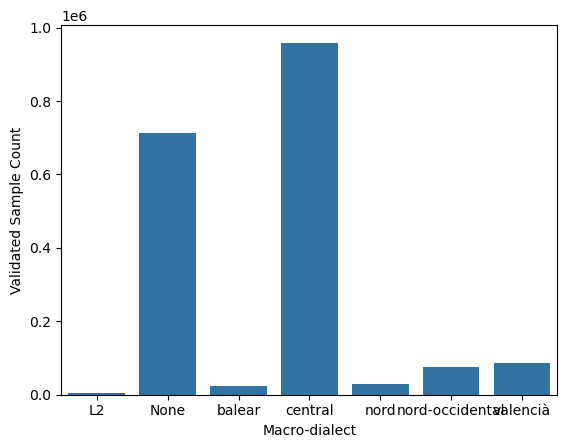

In [40]:
accent_dur = validated.drop(["client_id","sentence_id","sentence","path", "sentence_domain","up_votes",
                             "down_votes","age","gender","accents","variant","locale","segment",'clip','duration[ms]','duration[s]'],axis=1)
accent_counts = accent_dur.groupby(["grouped_accents"]).count()

sns.barplot(accent_counts, x="grouped_accents", y='duration[hr]')
plt.xlabel("Macro-dialect")
plt.ylabel("Validated Sample Count")

Text(0, 0.5, 'Validated Sample Duration (hr)')

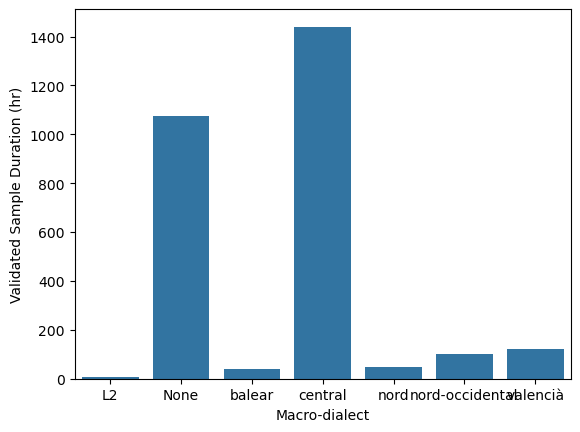

In [41]:
accent_dur=accent_dur.groupby(["grouped_accents"]).sum()

sns.barplot(accent_dur, x="grouped_accents", y='duration[hr]')
plt.xlabel("Macro-dialect")
plt.ylabel("Validated Sample Duration (hr)")

In [42]:
accent_dur

,duration[hr]
grouped_accents,
L2,8.566350
None,1075.642827
balear,38.761760
central,1440.055193
nord,47.254213
nord-occidental,101.791206
valencià,122.276544


In [43]:
#Later I saw there are a lot of repeat sentences; let's see if removing hurts the amount of data we have a lot
no_repeats = validated.drop_duplicates(subset=["sentence","grouped_accents"])

In [44]:
len(validated)-len(no_repeats)

314267

In [45]:
no_repeats.grouped_accents.value_counts()

grouped_accents
central            761017
None               598786
valencià            83742
nord-occidental     74452
nord                29970
balear              24864
L2                   5447
Name: count, dtype: int64

Text(0, 0.5, 'Validated Sample Count')

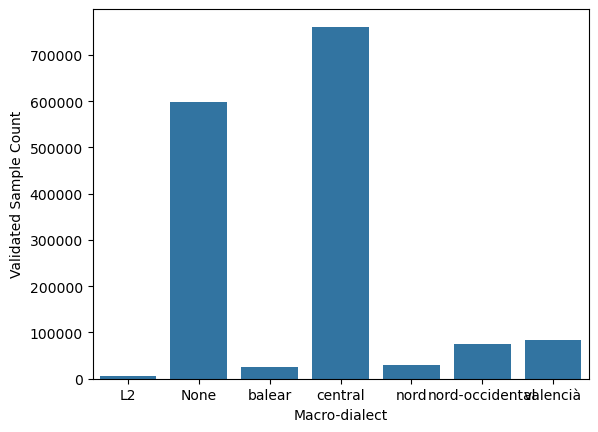

In [46]:
accent_dur = no_repeats.drop(["client_id","sentence_id","sentence","path", "sentence_domain","up_votes",
                             "down_votes","age","gender","accents","variant","locale","segment",'clip','duration[ms]','duration[s]'],axis=1)
accent_counts = accent_dur.groupby(["grouped_accents"]).count()

sns.barplot(accent_counts, x="grouped_accents", y='duration[hr]')
plt.xlabel("Macro-dialect")
plt.ylabel("Validated Sample Count")

Text(0, 0.5, 'Validated Sample Duration (hr)')

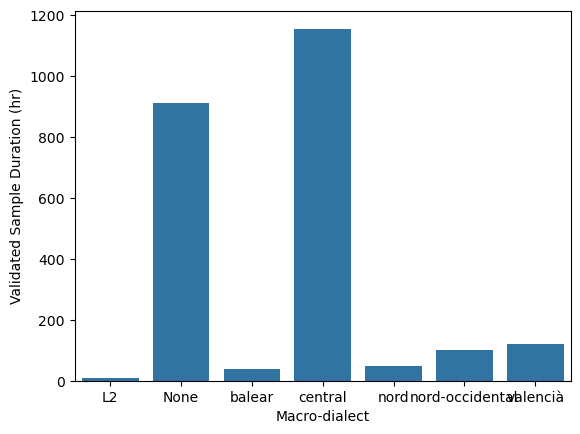

In [47]:
accent_dur=accent_dur.groupby(["grouped_accents"]).sum()

sns.barplot(accent_dur, x="grouped_accents", y='duration[hr]')
plt.xlabel("Macro-dialect")
plt.ylabel("Validated Sample Duration (hr)")

In [48]:
accent_dur

,duration[hr]
grouped_accents,
L2,8.560860
None,912.812622
balear,38.507143
central,1155.308409
nord,47.039447
nord-occidental,100.167827
valencià,120.035261
